##1. Import the necessary packages to read in the data, plot, and create a linear regression model

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt # package for doing plotting (necessary for adding the line)
import statsmodels.formula.api as smf # package we'll be using for linear regression
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
plt.style.use('ggplot')
import dateutil.parser
import math
import random
import matplotlib.ticker as plticker


matplotlib.rcParams['ps.fonttype'] = 42

## 2. Read in the hanford.csv file 

In [2]:
df = pd.read_csv("data/hanford.csv")
df.head()

,County,Exposure,Mortality
0,Umatilla,2.49,147.1
1,Morrow,2.57,130.1
2,Gilliam,3.41,129.9
3,Sherman,1.25,113.5
4,Wasco,1.62,137.5


<img src="images/hanford_variables.png">

## 3. Calculate the basic descriptive statistics on the data

In [16]:
df.describe()

,Exposure,Mortality
count,9.000000,9.000000
mean,4.617778,157.344444
std,3.491192,34.791346
min,1.250000,113.500000
25%,2.490000,130.100000
50%,3.410000,147.100000
75%,6.410000,177.900000
max,11.640000,210.300000


In [17]:
df.median()

Exposure       3.41
Mortality    147.10
dtype: float64

In [19]:
rang= df['Mortality'].max() - df['Mortality'].min()
rang

96.800000000000011

In [20]:
iqr_m = df['Mortality'].quantile(q=0.75)- df['Mortality'].quantile(q=0.25)
iqr_m

47.800000000000011

In [27]:
iqr_e = df['Exposure'].quantile(q=0.75)- df['Exposure'].quantile(q=0.25)
iqr_e

3.9199999999999999

In [22]:
UAL_m= (iqr_m*1.5) + df['Mortality'].quantile(q=0.75)
UAL_m

249.60000000000002

In [28]:
UAL_e= (iqr_m*1.5) + df['Exposure'].quantile(q=0.75)
UAL_e

78.110000000000014

In [29]:
LAL_m= df['Mortality'].quantile(q=0.25) - (iqr_e*1.5)  
LAL_m

124.22

In [30]:
LAL_e= df['Exposure'].quantile(q=0.25) - (iqr_e*1.5)  
LAL_e

-3.3899999999999997

In [25]:
len(df[df['Mortality']> UAL_m]) 

0

In [31]:
len(df[df['Exposure']> UAL_e]) 

0

In [26]:
len(df[df['Mortality']< LAL_m]) 

0

In [32]:
len(df[df['Mortality'] > UAL_m])

0

## 4. Calculate the coefficient of correlation (r) and generate the scatter plot. Does there seem to be a correlation worthy of investigation?

In [8]:
df.corr()

,Exposure,Mortality
Exposure,1.000000,0.926345
Mortality,0.926345,1.000000


## 5. Create a linear regression model based on the available data to predict the mortality rate given a level of exposure

In [10]:
lm = smf.ols(formula="Mortality~Exposure",data=df).fit()
lm.params

Intercept    114.715631
Exposure       9.231456
dtype: float64

In [11]:
def exposure_predict(exposure):
    df = pd.read_csv("data/hanford.csv")
    lm = smf.ols(formula="Mortality~Exposure",data=df).fit()
    mortality = exposure * lm.params.Exposure + lm.params.Intercept
    return mortality

## 6. Plot the linear regression line on the scatter plot of values. Calculate the r^2 (coefficient of determination)

In [13]:
intercept, slope = lm.params

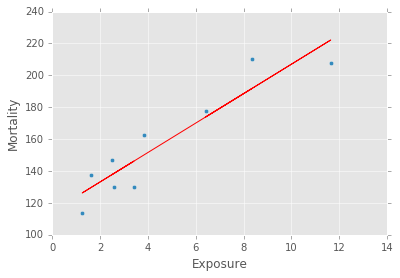

In [14]:
df.plot(kind="scatter",x="Exposure",y="Mortality")
plt.plot(df["Exposure"],slope*df["Exposure"]+intercept,"-",color="red")

## 7. Predict the mortality rate (Cancer per 100,000 man years) given an index of exposure = 10

In [15]:
exposure_predict(10)

207.03019352841986